In [1]:
#csv 파일에는 이미지 경로(path) + 정답(label)이, label.txt에는 label이 있다.

#데이터 불러오기
import pandas as pd
import os

csv_file_path = "/Users/hongseung-ui/Documents/ocr/a_label_image_mapping_2350.csv"
label_file_path = "/Users/hongseung-ui/Documents/ocr/상용한글2350.txt"

csv_file = open(csv_file_path, 'r', encoding = "UTF-16")
labels_file = list(open(label_file_path, 'r', encoding = "UTF-8").read())

#정답과 index를 매핑한 정답 딕셔너리 초기화하기 label_dict = {'가':1, ... ,'힣':11172}
label_dict = {}
count = 0
for label in labels_file:
    label_dict[label] = count
    count += 1
    
datas = [] #학습시킬 데이터들 
labels = [] #정답

#csv 파일에서 이미지 경로와 한글 조합들을 각각 리스트 datas[]와 labels[]에 저장하기
for row in csv_file:
    path, label = row.strip().split(',') #strip():문자열에서 공백 없애기, split(','):,기준으로 문자열 자르기
    datas.append(path)
    labels.append(label_dict[label])
    
print("finished")

finished


In [9]:
#학습시킬 데이터를 섞어주고 정답 labels도 생성하기.
import random

seed = 2000

shuffled_indexes = list(range(len(datas))) #데이터 수만큼의 정수가 든 배열 만들기
random.seed(seed)
random.shuffle(shuffled_indexes)
datas = [datas[index] for index in shuffled_indexes] 
labels = [labels[index] for index in shuffled_indexes]

2057
/Users/hongseung-ui/Documents/myenv/bin/datasets/Hangul_Syllables/툐/NanumGothicBold_툐.png
1010
/Users/hongseung-ui/Documents/myenv/bin/datasets/Hangul_Syllables/븀/NanumGothicExtraBold_븀.png
1850
/Users/hongseung-ui/Documents/myenv/bin/datasets/Hangul_Syllables/춘/NanumSquareExtraBold_춘.png
278
/Users/hongseung-ui/Documents/myenv/bin/datasets/Hangul_Syllables/끔/NanumBarunGothicLight_끔.png
445
/Users/hongseung-ui/Documents/myenv/bin/datasets/Hangul_Syllables/닸/NanumBarunGothic_닸.png


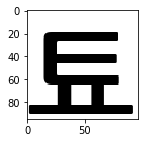

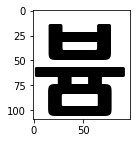

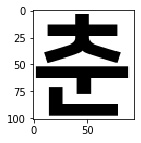

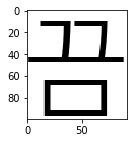

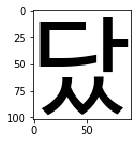

In [10]:
#잘 섞였는지, 이미지 경로가 올바른지 테스트
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0, 5):
    print(labels[i])
    print(datas[i])
    
    img = mpimg.imread(datas[i])
    plt.figure(figsize=(2,2))
    plt.imshow(img, cmap='gray')

In [13]:
#경로에 있는 이미지들을 리스트에 담기
import cv2 #영상처리 라이브러리 openCV
from tqdm import tqdm #진행 % 알 수 있다

X_data = []

for imagePath in tqdm(datas):
    image = cv2.imread(imagePath) #imread() : numpy.ndarray 타입 반환
    X_data.append(image)

100%|██████████| 54050/54050 [00:31<00:00, 1695.01it/s]


In [19]:
#54050 (폰트 23개 x 상용한글 2350개) 데이터를 훈련셋과 테스트셋 8:2 으로 나눈다.
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(X_data, dtype=object) #리스트->배열
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # train_test_split(arrays) 테스트셋 20%